# School result analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
fpath = '/Users/mavenclu/Projects/Schools/20250617-1303_GSK.NasjonaleProever.csv'



In [3]:
df = pd.read_csv(fpath, sep='\t',  encoding='utf-16le', skiprows=1)




In [4]:
df.columns.tolist()

['EnhetNivaa',
 'Nasjonaltkode',
 'Fylkekode',
 'Kommunekode',
 'Organisasjonsnummer',
 'Nasjonalt',
 'Fylke',
 'Kommune',
 'EnhetNavn',
 '2024-25.Engelsk.5. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng',
 '2024-25.Engelsk.5. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet',
 '2024-25.Engelsk.5. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt',
 '2024-25.Lesing.5. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng',
 '2024-25.Lesing.5. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet',
 '2024-25.Lesing.5. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt',
 '2024-25.Regning.5. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng',
 '2024-25.Regning.5. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet',
 '2024-25.Regning.5. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt']

In [5]:
rename_dict = {
    '2024-25.Engelsk.5. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng': 'english_points',
    '2024-25.Engelsk.5. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet': 'english_uncertainty',
    '2024-25.Engelsk.5. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt': 'english_students',
    '2024-25.Lesing.5. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng': 'reading_points',
    '2024-25.Lesing.5. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet': 'reading_uncertainty',
    '2024-25.Lesing.5. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt': 'reading_students',
    '2024-25.Regning.5. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng': 'math_points',
    '2024-25.Regning.5. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet': 'math_uncertainty',
    '2024-25.Regning.5. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt': 'math_students'
}

df = df.rename(columns=rename_dict)
df.head()

,EnhetNivaa,Nasjonaltkode,Fylkekode,Kommunekode,Organisasjonsnummer,Nasjonalt,Fylke,Kommune,EnhetNavn,english_points,english_uncertainty,english_students,reading_points,reading_uncertainty,reading_students,math_points,math_uncertainty,math_students
0,1,I,0,0,I,Hele landet,Alle fylker,Alle kommuner,Alle skoler,51,"0,1",56 833,49,"0,1",56 155,49,"0,1",56 771
1,2,I,42,0,42,Hele landet,Agder,Alle kommuner,Alle skoler,50,"0,3",3 363,49,"0,3",3 329,49,"0,3",3 362
2,3,I,42,4203,4203,Hele landet,Agder,Arendal,Alle skoler,51,"0,8",476,48,"0,8",473,49,"0,8",469
3,4,I,42,4203,990334021,Hele landet,Agder,Arendal,Arendal International School (Ais),56,"2,7",22,47,"4,0",20,50,"3,2",22
4,4,I,42,4203,975280888,Hele landet,Agder,Arendal,Asdal skole,50,"2,7",40,46,"2,2",37,51,"2,6",35


In [6]:
df_sorted = df.sort_values(
    by=['math_points', 'reading_points', 'english_points'],
    ascending=[False, False, False]
)
df_sorted.head(25)

,EnhetNivaa,Nasjonaltkode,Fylkekode,Kommunekode,Organisasjonsnummer,Nasjonalt,Fylke,Kommune,EnhetNavn,english_points,english_uncertainty,english_students,reading_points,reading_uncertainty,reading_students,math_points,math_uncertainty,math_students
1930,4,I,39,3901,974605708,Hele landet,Vestfold,Horten,Fagerheim skole,61,"3,6",12,57,"3,6",12,62,"4,6",12
1928,4,I,39,3903,975268748,Hele landet,Vestfold,Holmestrand,Selvik skole,49,"2,8",31,55,"2,5",31,62,"1,9",31
2069,4,I,46,4601,974737892,Hele landet,Vestland,Bergen,Hellen skole,58,"2,1",53,56,"2,0",53,61,"1,8",53
240,4,I,32,3220,975272664,Hele landet,Akershus,Enebakk,Kirkebygden barne- og ungdomsskole,55,"4,1",15,55,"4,0",15,61,"5,0",14
220,4,I,32,3201,971845635,Hele landet,Akershus,Bærum,Oslo International School,62,"3,6",12,52,"4,6",12,61,"4,4",12
827,4,I,15,1506,973994662,Hele landet,Møre og Romsdal,Molde,Kleive oppvekstsenter skole,*,*,*,*,*,*,60,"4,0",10
1155,4,I,3,301,974589834,Hele landet,Oslo,Oslo,Huseby skole,57,"2,5",56,59,"2,5",55,59,"2,8",56
1130,4,I,3,301,987865997,Hele landet,Oslo,Oslo,Bogstad skole,53,"2,9",53,57,"2,4",53,59,"2,3",52
196,4,I,32,3226,974602326,Hele landet,Akershus,Aurskog-Høland,Aurskog-Høland kommune - Rømskog skole,51,"5,2",10,54,"5,1",10,59,"3,7",10
1183,4,I,3,301,974590018,Hele landet,Oslo,Oslo,Maridalen skole,50,"5,1",11,53,"5,7",11,59,"6,5",11


In [7]:
filtered = df_sorted[df_sorted['EnhetNavn'].isin(['Kastellet skole', 'Hellen skole', 'Slettebakken skole'])]
filtered

,EnhetNivaa,Nasjonaltkode,Fylkekode,Kommunekode,Organisasjonsnummer,Nasjonalt,Fylke,Kommune,EnhetNavn,english_points,english_uncertainty,english_students,reading_points,reading_uncertainty,reading_students,math_points,math_uncertainty,math_students
2069,4,I,46,4601,974737892,Hele landet,Vestland,Bergen,Hellen skole,58,"2,1",53,56,"2,0",53,61,"1,8",53
1162,4,I,3,301,987131780,Hele landet,Oslo,Oslo,Kastellet skole,54,"2,3",62,53,"2,6",62,55,"2,3",62
2109,4,I,46,4601,974737876,Hele landet,Vestland,Bergen,Slettebakken skole,48,"2,9",46,46,"3,1",47,47,"3,1",46


In [8]:
filtered = df[
    (df['Fylke'] == 'Vestland') &
    (df['Kommune'] == 'Bergen')
].copy()

filtered['math_points'] = (
    filtered['math_points']
    .astype(str)
    .str.replace(' ', '', regex=False)
    .str.replace(',', '.', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)
filtered['reading_points'] = (
    filtered['reading_points']
    .astype(str)
    .str.replace(' ', '', regex=False)
    .str.replace(',', '.', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)

filtered_sorted = filtered.sort_values(
    by=['math_points', 'reading_points'],
    ascending=[False, False]
)
filtered_sorted.head(50)

,EnhetNivaa,Nasjonaltkode,Fylkekode,Kommunekode,Organisasjonsnummer,Nasjonalt,Fylke,Kommune,EnhetNavn,english_points,english_uncertainty,english_students,reading_points,reading_uncertainty,reading_students,math_points,math_uncertainty,math_students
2069,4,I,46,4601,974737892,Hele landet,Vestland,Bergen,Hellen skole,58,"2,1",53,56.0,"2,0",53,61.0,"1,8",53
2067,4,I,46,4601,974737930,Hele landet,Vestland,Bergen,Haukeland skole,54,"2,9",42,56.0,"2,0",43,57.0,"2,5",43
2073,4,I,46,4601,974187442,Hele landet,Vestland,Bergen,International School Of Bergen Avd skole,63,"3,1",13,NaN,*,*,57.0,"6,0",12
2105,4,I,46,4601,974737841,Hele landet,Vestland,Bergen,Seljedalen skole,56,"2,9",25,55.0,"3,4",25,56.0,"3,8",25
2071,4,I,46,4601,974738368,Hele landet,Vestland,Bergen,Holen skole,55,"4,1",25,53.0,"4,1",23,56.0,"3,8",23
2070,4,I,46,4601,874738182,Hele landet,Vestland,Bergen,Hjellestad skole,52,"3,6",27,53.0,"2,8",27,55.0,"3,0",26
2094,4,I,46,4601,974737965,Hele landet,Vestland,Bergen,Møhlenpris Oppveksttun Avd skole,51,"2,5",37,52.0,"3,0",37,55.0,"2,6",36
2101,4,I,46,4601,974738317,Hele landet,Vestland,Bergen,Paradis skole,53,"2,3",68,52.0,"2,4",65,55.0,"2,2",68
2115,4,I,46,4601,974738244,Hele landet,Vestland,Bergen,Sædalen skole,53,"2,6",51,52.0,"2,4",51,55.0,"3,0",51
2054,4,I,46,4601,974222078,Hele landet,Vestland,Bergen,Aurdalslia skole,56,"3,2",44,51.0,"2,7",44,55.0,"3,0",46


In [9]:
fname9 = '20250617-1657_GSK.NasjonaleProever.csv'

df8 = pd.read_csv(fname9, sep='\t', encoding='utf-16le', skiprows=1)

In [10]:
rename_dict.update({
    '2024-25.Engelsk.8. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng': 'english8_points',
    '2024-25.Engelsk.8. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet': 'english8_uncertainty',
    '2024-25.Engelsk.8. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt': 'english8_students',
    '2024-25.Lesing.8. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng': 'reading8_points',
    '2024-25.Lesing.8. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet': 'reading8_uncertainty',
    '2024-25.Lesing.8. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt': 'reading8_students',
    '2024-25.Regning.8. årstrinn.Alle eierformer.Alle kjønn.Skalapoeng': 'math8_points',
    '2024-25.Regning.8. årstrinn.Alle eierformer.Alle kjønn.Usikkerhet': 'math8_uncertainty',
    '2024-25.Regning.8. årstrinn.Alle eierformer.Alle kjønn.Antall elever deltatt': 'math8_students'
})

df8 = df8.rename(columns=rename_dict)

In [11]:
df8_sorted = df8.sort_values(
    by=['math8_points', 'reading8_points', 'english8_points'],
    ascending=[False, False, False]
)
df8_sorted.head(10)

,EnhetNivaa,Nasjonaltkode,Fylkekode,Kommunekode,Organisasjonsnummer,Nasjonalt,Fylke,Kommune,EnhetNavn,english8_points,english8_uncertainty,english8_students,reading8_points,reading8_uncertainty,reading8_students,math8_points,math8_uncertainty,math8_students
129,4,I,32,3201,816691842,Hele landet,Akershus,Bærum,Norges Realfagsungdomsskole Sandvika AS,63,"1,7",80,60,"1,6",80,66,"1,2",80
864,4,I,11,1108,874610852,Hele landet,Rogaland,Sandnes,Høle barne- og ungdomsskule,56,"4,7",18,49,"5,0",18,58,"3,5",18
753,4,I,3,301,987131780,Hele landet,Oslo,Oslo,Kastellet skole,57,"2,2",56,56,"2,1",56,57,"2,4",56
111,4,I,32,3203,998258383,Hele landet,Akershus,Asker,Stiftelsen Asker International School,63,"1,9",57,52,"2,8",45,57,"2,3",55
735,4,I,3,301,973480634,Hele landet,Oslo,Oslo,Den Tysk-Norske skolen i Oslo Avd grunnskole S...,58,"2,0",24,51,"1,5",21,57,"3,7",22
6,4,I,42,4203,982944694,Hele landet,Agder,Arendal,Hisøy skole 1-10 Skoler,55,"3,4",34,56,"3,0",34,56,"3,8",31
130,4,I,32,3201,990672938,Hele landet,Akershus,Bærum,Norges Toppidrettsgymnas ungdomsskole Bærum AS,56,"1,6",87,55,"1,8",89,56,"1,7",89
1354,4,I,46,4648,975276686,Hele landet,Vestland,Bremanger,Davik Oppvekst Avd skule,56,"6,1",10,55,"4,7",10,56,"5,3",10
1078,4,I,55,5501,915239013,Hele landet,Troms - Romsa - Tromssa,Tromsø,Norges Toppidrettsgymnas ungdomsskole Tromsø AS,55,"2,8",31,55,"3,3",32,56,"3,5",30
1198,4,I,50,5001,973358502,Hele landet,Trøndelag - Trööndelage,Trondheim - Tråante,Birralee International School Trondheim AS Avd...,58,"3,1",25,50,"4,1",19,56,"3,5",20


In [12]:
for col in ['english_points', 'english_uncertainty', 'reading_points', 'reading_uncertainty', 'math_points', 'math_uncertainty']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(' ', '', regex=False)
        .str.replace(',', '.', regex=False)
        .pipe(pd.to_numeric, errors='coerce')
    )

for col in ['english_students', 'reading_students', 'math_students']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(' ', '', regex=False), errors='coerce').astype('Int64')

In [13]:
for col in [
    'english8_points', 'english8_uncertainty',
    'reading8_points', 'reading8_uncertainty',
    'math8_points', 'math8_uncertainty'
]:
    df8[col] = (
        df8[col]
        .astype(str)
        .str.replace(' ', '', regex=False)
        .str.replace(',', '.', regex=False)
        .pipe(pd.to_numeric, errors='coerce')
    )

for col in ['english8_students', 'reading8_students', 'math8_students']:
    df8[col] = pd.to_numeric(df8[col].astype(str).str.replace(' ', '', regex=False), errors='coerce').astype('Int64')

In [14]:
df8.dtypes

EnhetNivaa                int64
Nasjonaltkode            object
Fylkekode                 int64
Kommunekode               int64
Organisasjonsnummer      object
Nasjonalt                object
Fylke                    object
Kommune                  object
EnhetNavn                object
english8_points         float64
english8_uncertainty    float64
english8_students         Int64
reading8_points         float64
reading8_uncertainty    float64
reading8_students         Int64
math8_points            float64
math8_uncertainty       float64
math8_students            Int64
dtype: object

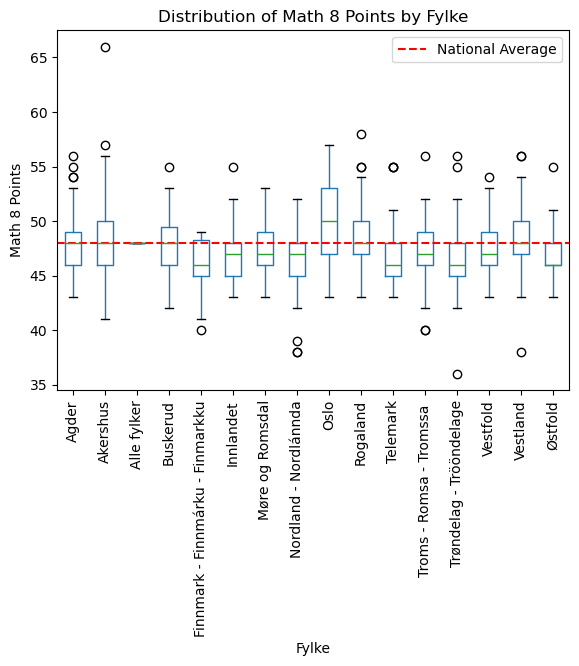

In [15]:
import matplotlib.pyplot as plt

# National average from first row
national_avg = df8.iloc[0]['math8_points']

df8.boxplot(column='math8_points', by='Fylke', rot=90, grid=False)
plt.axhline(y=national_avg, color='red', linestyle='--', label='National Average')
plt.title('Distribution of Math 8 Points by Fylke')
plt.suptitle('')
plt.xlabel('Fylke')
plt.ylabel('Math 8 Points')
plt.legend()
plt.show()

,EnhetNavn,math8_points,reading8_points,english8_points
0,International School Of Bergen Avd skole,54.0,55.0,62.0
1,Norges Toppidrettsgymnas ungdomsskole Bergen AS,53.0,52.0,52.0
2,Foreningen Danielsen ungdomsskole Bergen,53.0,52.0,53.0
3,Hop Oppveksttun skole,53.0,50.0,53.0
4,St Paul skole,52.0,50.0,56.0
5,Kastellet skole,57.0,56.0,57.0


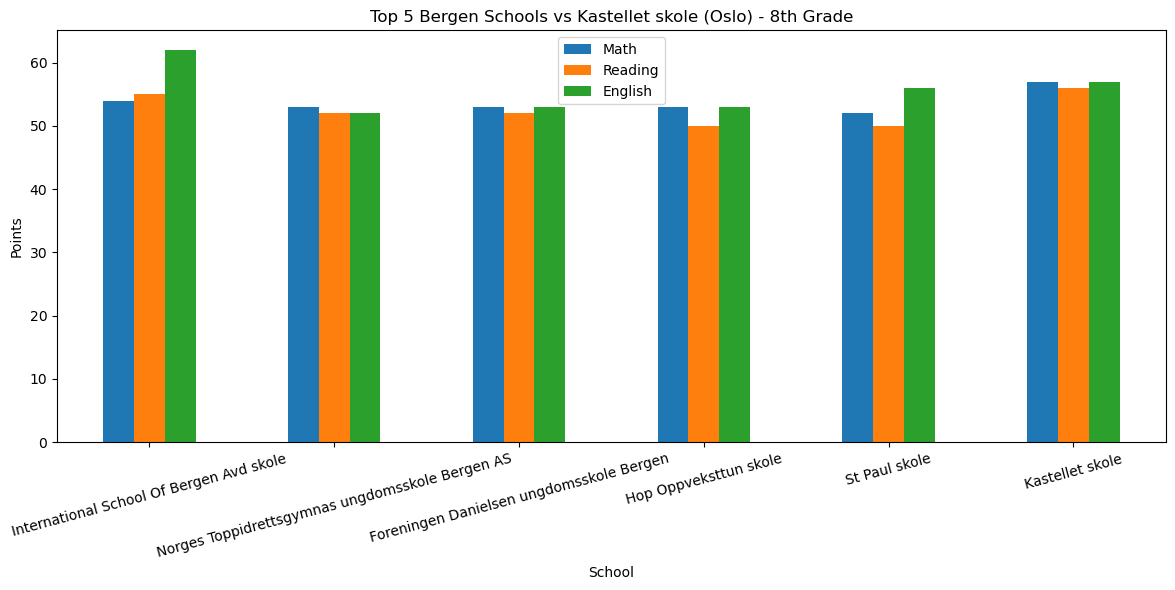

In [16]:
import matplotlib.pyplot as plt

# Get top 5 math schools in Bergen
top5_bergen = (
    df8[df8['Kommune'] == 'Bergen']
    .sort_values(by='math8_points', ascending=False)
    .head(5)
    [['EnhetNavn', 'math8_points', 'reading8_points', 'english8_points']]
)

# Get Kastellet skole in Oslo
kastellet = df8[(df8['Kommune'] == 'Oslo') & (df8['EnhetNavn'] == 'Kastellet skole')]
kastellet = kastellet[['EnhetNavn', 'math8_points', 'reading8_points', 'english8_points']]

# Combine for comparison
compare_df = pd.concat([top5_bergen, kastellet], ignore_index=True)
display(compare_df)

# Plot
compare_df.set_index('EnhetNavn')[['math8_points', 'reading8_points', 'english8_points']].plot(
    kind='bar', figsize=(12,6)
)
plt.title('Top 5 Bergen Schools vs Kastellet skole (Oslo) - 8th Grade')
plt.ylabel('Points')
plt.xlabel('School')
plt.xticks(rotation=15)
plt.legend(['Math', 'Reading', 'English'])
plt.tight_layout()
plt.show()

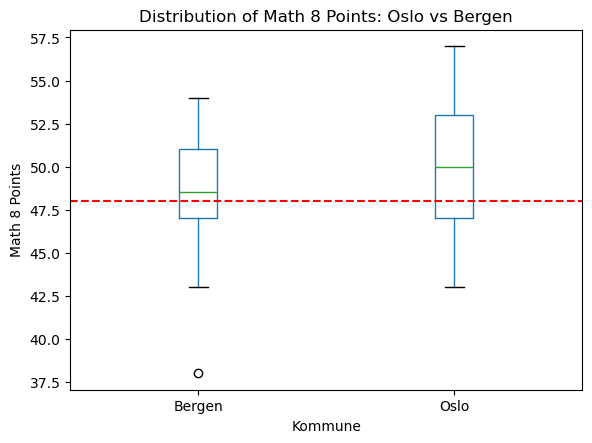

In [17]:
import matplotlib.pyplot as plt

# Filter for Oslo and Bergen
oslo_bergen = df8[df8['Kommune'].isin(['Oslo', 'Bergen'])]

# Create boxplot
oslo_bergen.boxplot(column='math8_points', by='Kommune', grid=False)
plt.axhline(y=national_avg, color='red', linestyle='--', label='National Average')

plt.title('Distribution of Math 8 Points: Oslo vs Bergen')
plt.suptitle('')
plt.xlabel('Kommune')
plt.ylabel('Math 8 Points')
plt.show()

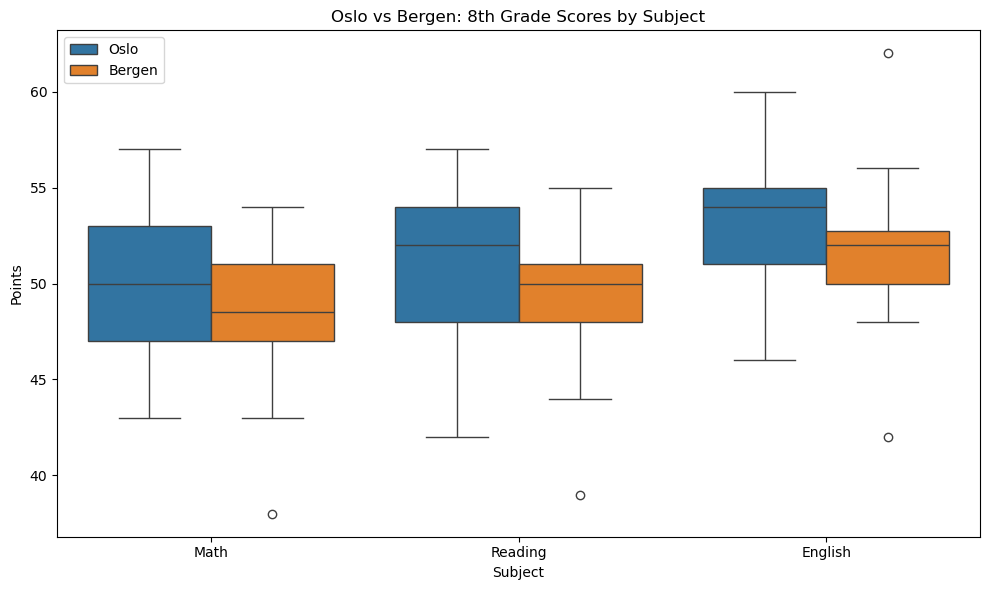

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Oslo and Bergen
oslo_bergen = df8[df8['Kommune'].isin(['Oslo', 'Bergen'])]

# Melt the DataFrame to long format
long_df = oslo_bergen.melt(
    id_vars=['Kommune'],
    value_vars=['math8_points', 'reading8_points', 'english8_points'],
    var_name='Subject',
    value_name='Points'
)

# Rename subjects for nicer labels
long_df['Subject'] = long_df['Subject'].map({
    'math8_points': 'Math',
    'reading8_points': 'Reading',
    'english8_points': 'English'
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=long_df, x='Subject', y='Points', hue='Kommune')
# Add national averages as horizontal lines


plt.title('Oslo vs Bergen: 8th Grade Scores by Subject')
plt.ylabel('Points')
plt.xlabel('Subject')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
df8.dtypes

EnhetNivaa                int64
Nasjonaltkode            object
Fylkekode                 int64
Kommunekode               int64
Organisasjonsnummer      object
Nasjonalt                object
Fylke                    object
Kommune                  object
EnhetNavn                object
english8_points         float64
english8_uncertainty    float64
english8_students         Int64
reading8_points         float64
reading8_uncertainty    float64
reading8_students         Int64
math8_points            float64
math8_uncertainty       float64
math8_students            Int64
dtype: object

In [20]:
df8.head()


,EnhetNivaa,Nasjonaltkode,Fylkekode,Kommunekode,Organisasjonsnummer,Nasjonalt,Fylke,Kommune,EnhetNavn,english8_points,english8_uncertainty,english8_students,reading8_points,reading8_uncertainty,reading8_students,math8_points,math8_uncertainty,math8_students
0,1,I,0,0,I,Hele landet,Alle fylker,Alle kommuner,Alle skoler,50.0,0.1,60594,49.0,0.1,60348,48.0,0.1,60519
1,2,I,42,0,42,Hele landet,Agder,Alle kommuner,Alle skoler,50.0,0.3,3771,48.0,0.3,3767,48.0,0.3,3754
2,3,I,42,4203,4203,Hele landet,Agder,Arendal,Alle skoler,51.0,0.9,527,49.0,0.8,521,48.0,0.8,521
3,4,I,42,4203,990334021,Hele landet,Agder,Arendal,Arendal International School (Ais),61.0,2.5,24,49.0,3.7,21,50.0,3.6,23
4,4,I,42,4203,975280888,Hele landet,Agder,Arendal,Asdal skole,47.0,2.0,74,45.0,1.5,76,46.0,1.8,74


---

# Oslo

## Correlation between school results and price of housing

In [21]:
import pandas as pd

# Data for 8th grade (Lesing, Regning, Engelsk)
data = {
    "Bydel": [
        "Alna", "Bjerke", "Frogner", "Gamle Oslo", "Grorud", "Grünerløkka", "Nordre Aker", "Nordstrand",
        "Sagene", "St. Hanshaugen", "Stovner", "Søndre Nordstrand", "Ullern", "Vestre Aker", "Østensjø"
    ],
    "Lesing": [47.1, 51.2, 52.9, 51.0, 48.4, 50.9, 57.4, 54.3, 52.5, 55.0, 45.9, 47.3, 55.6, 56.4, 54.0],
    "Regning": [47.3, 49.9, 52.6, 50.0, 46.9, 50.3, 56.2, 53.6, 51.5, 55.0, 47.6, 47.9, 55.8, 56.6, 53.0],
    "Engelsk": [49.3, 52.1, 54.4, 54.0, 50.5, 53.9, 55.4, 53.6, 54.0, 56.0, 49.3, 49.3, 55.7, 55.4, 56.8]
}

df_oslo_8th = pd.DataFrame(data)
display(df_oslo_8th)

,Bydel,Lesing,Regning,Engelsk
0,Alna,47.1,47.3,49.3
1,Bjerke,51.2,49.9,52.1
2,Frogner,52.9,52.6,54.4
3,Gamle Oslo,51.0,50.0,54.0
4,Grorud,48.4,46.9,50.5
5,Grünerløkka,50.9,50.3,53.9
6,Nordre Aker,57.4,56.2,55.4
7,Nordstrand,54.3,53.6,53.6
8,Sagene,52.5,51.5,54.0
9,St. Hanshaugen,55.0,55.0,56.0


In [22]:
# Add price per square meter to the 8th grade dataframe

# Read price data
price_df = pd.read_csv(
    '/Users/mavenclu/Downloads/Gjennomsnittlig kvadratmeterpris for blokkleiligheter  i Oslo (2024).csv',
    sep=';',
    encoding='utf-8'
)

# Clean up price_df for merging
price_df['Bydel'] = price_df['Geografi'].str.replace('Bydel ', '').str.strip()
price_df = price_df.rename(columns={'Antall': 'Pris_per_kvm'})
price_df['Pris_per_kvm'] = pd.to_numeric(price_df['Pris_per_kvm'], errors='coerce')

# Merge with 8th grade dataframe
df_oslo_8th = df_oslo_8th.merge(price_df[['Bydel', 'Pris_per_kvm']], on='Bydel', how='left')

display(df_oslo_8th)

,Bydel,Lesing,Regning,Engelsk,Pris_per_kvm
0,Alna,47.1,47.3,49.3,68500
1,Bjerke,51.2,49.9,52.1,80200
2,Frogner,52.9,52.6,54.4,119200
3,Gamle Oslo,51.0,50.0,54.0,101400
4,Grorud,48.4,46.9,50.5,67300
5,Grünerløkka,50.9,50.3,53.9,104400
6,Nordre Aker,57.4,56.2,55.4,103200
7,Nordstrand,54.3,53.6,53.6,83600
8,Sagene,52.5,51.5,54.0,110200
9,St. Hanshaugen,55.0,55.0,56.0,113200


/var/folders/g7/q9j14jhd1ng8tb3n72nx23z80000gn/T/ipykernel_33231/1586858250.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bydels, rotation=45, ha='right')


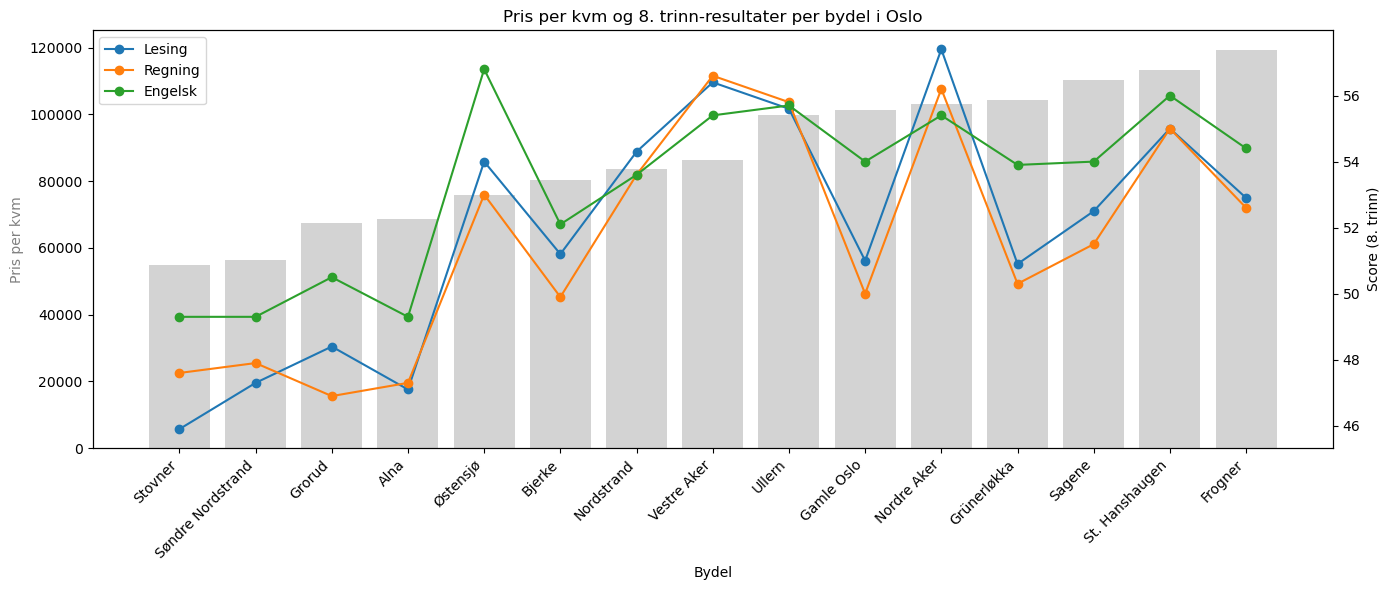

In [23]:
import matplotlib.pyplot as plt

# Sort by price per square meter
df_sorted = df_oslo_8th.sort_values(by='Pris_per_kvm')

# Plot bar for price per square meter
fig, ax1 = plt.subplots(figsize=(14, 6))

bydels = df_sorted['Bydel']

# Bar plot for price
ax1.bar(bydels, df_sorted['Pris_per_kvm'], color='lightgray', label='Pris per kvm')
ax1.set_ylabel('Pris per kvm', color='gray')
ax1.set_xlabel('Bydel')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(bydels, rotation=45, ha='right')

# Line plot for grades
ax2 = ax1.twinx()
ax2.plot(bydels, df_sorted['Lesing'], marker='o', label='Lesing', color='tab:blue')
ax2.plot(bydels, df_sorted['Regning'], marker='o', label='Regning', color='tab:orange')
ax2.plot(bydels, df_sorted['Engelsk'], marker='o', label='Engelsk', color='tab:green')
ax2.set_ylabel('Score (8. trinn)')
ax2.legend(loc='upper left')

plt.title('Pris per kvm og 8. trinn-resultater per bydel i Oslo')
plt.tight_layout()
plt.show()